# Problem Statement
Predict the expense based on BMI.
Data is colleccted from https://www.kaggle.com/noordeen/insurance-premium-prediction/

In [101]:
#preprocessing libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modelling and metrics libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [102]:
#read the dataset
data = pd.read_csv("insurance.csv")
data_orig = data.copy()

In [103]:
data.shape

(1338, 7)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [106]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [107]:
data.index

RangeIndex(start=0, stop=1338, step=1)

In [108]:
#check for any null values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [109]:
    data.notna().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
expenses    1338
dtype: int64

In [110]:
#check for duplicate observations
data.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [111]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [112]:
#remove duplicate observations
data.drop_duplicates(inplace=True)

In [113]:
data.duplicated().value_counts()

False    1337
dtype: int64

In [114]:
#describe non-numeric data
data.describe(exclude=data.dtypes[data.dtypes != np.object].unique())

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [115]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [116]:
data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [117]:
#find observations that can be converted to dimenstions
[print(data[i].value_counts(),"\n") for i in data.columns if data[i].nunique()<=20]

male      675
female    662
Name: sex, dtype: int64 

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 

no     1063
yes     274
Name: smoker, dtype: int64 

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64 



[None, None, None, None]

In [118]:
data.apply(lambda x:print(x.value_counts()))

18    69
19    67
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64
male      675
female    662
Name: sex, dtype: int64
27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
40.7     1
19.2     1
38.7     1
41.7     1
19.3     1
Name: bmi, Length: 275, dtype: int64
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1063
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64
5693.43     1
1832.09     1
46255.11    1
1842.52     1
4561.19     1
           ..
2257.48     1
4260.74     1
44

age         None
sex         None
bmi         None
children    None
smoker      None
region      None
expenses    None
dtype: object

In [119]:
print(data["sex"].value_counts())
data["sex"] = np.where(data["sex"]=="male",1,0)
print(data["sex"].value_counts())

male      675
female    662
Name: sex, dtype: int64
1    675
0    662
Name: sex, dtype: int64


In [120]:
print(data["smoker"].value_counts())
data["smoker"] = np.where(data["smoker"]=="yes",1,0)
print(data["smoker"].value_counts())

no     1063
yes     274
Name: smoker, dtype: int64
0    1063
1     274
Name: smoker, dtype: int64


In [121]:
print(data["region"].value_counts())
data["region"].replace({"southwest":0,"southeast":1,"northwest":2,"northeast":3},inplace=True)
print(data["region"].value_counts())

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64
1    364
0    325
3    324
2    324
Name: region, dtype: int64


In [122]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [123]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

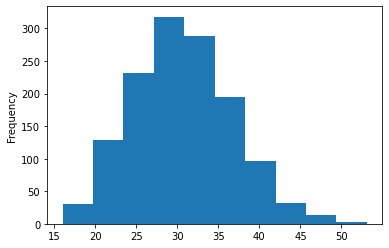

In [124]:
data.bmi.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

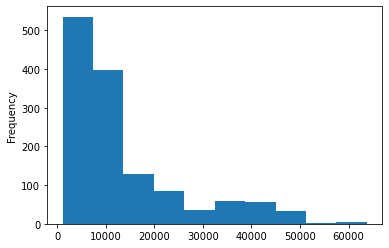

In [125]:
data.expenses.plot(kind='hist')

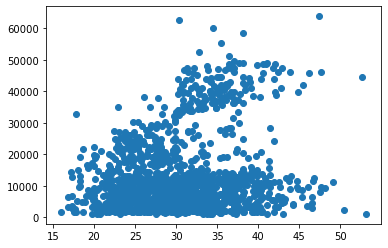

In [126]:
plt.scatter(x=data.bmi,y=data.expenses)

In [127]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


<AxesSubplot:ylabel='children'>

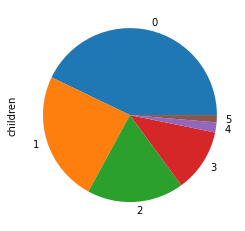

In [128]:
data['children'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='region'>

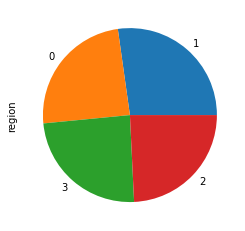

In [129]:
data.region.value_counts().plot(kind='pie')

In [130]:
num_col = data.select_dtypes(include=np.number).columns
cat_col = data.select_dtypes(exclude=np.number).columns

In [131]:
num_col, cat_col

(Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object'),
 Index([], dtype='object'))

In [132]:
print(data_orig.select_dtypes(include=np.number).columns)
print(data_orig.select_dtypes(exclude=np.number).columns)

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [133]:
#One hot encoding
#encoded_cat_col = pd.get_dummies(data[cat_col])
#encoded_cat_col

In [134]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [135]:
corr = data.corr()
corr

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.109414,0.041536,-0.025587,-0.001626,0.298308
sex,-0.019814,1.000000,0.046405,0.017848,0.076596,-0.004936,0.058045
bmi,0.109414,0.046405,1.000000,0.012641,0.003964,-0.157448,0.198637
children,0.041536,0.017848,0.012641,1.000000,0.007331,-0.016258,0.067389
smoker,-0.025587,0.076596,0.003964,0.007331,1.000000,0.002358,0.787234
region,-0.001626,-0.004936,-0.157448,-0.016258,0.002358,1.000000,0.006547
expenses,0.298308,0.058045,0.198637,0.067389,0.787234,0.006547,1.000000


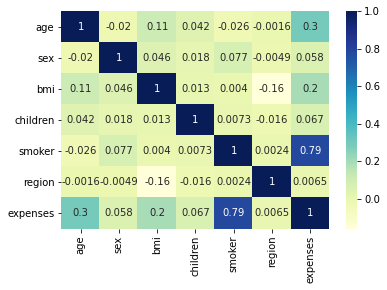

In [136]:
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True)

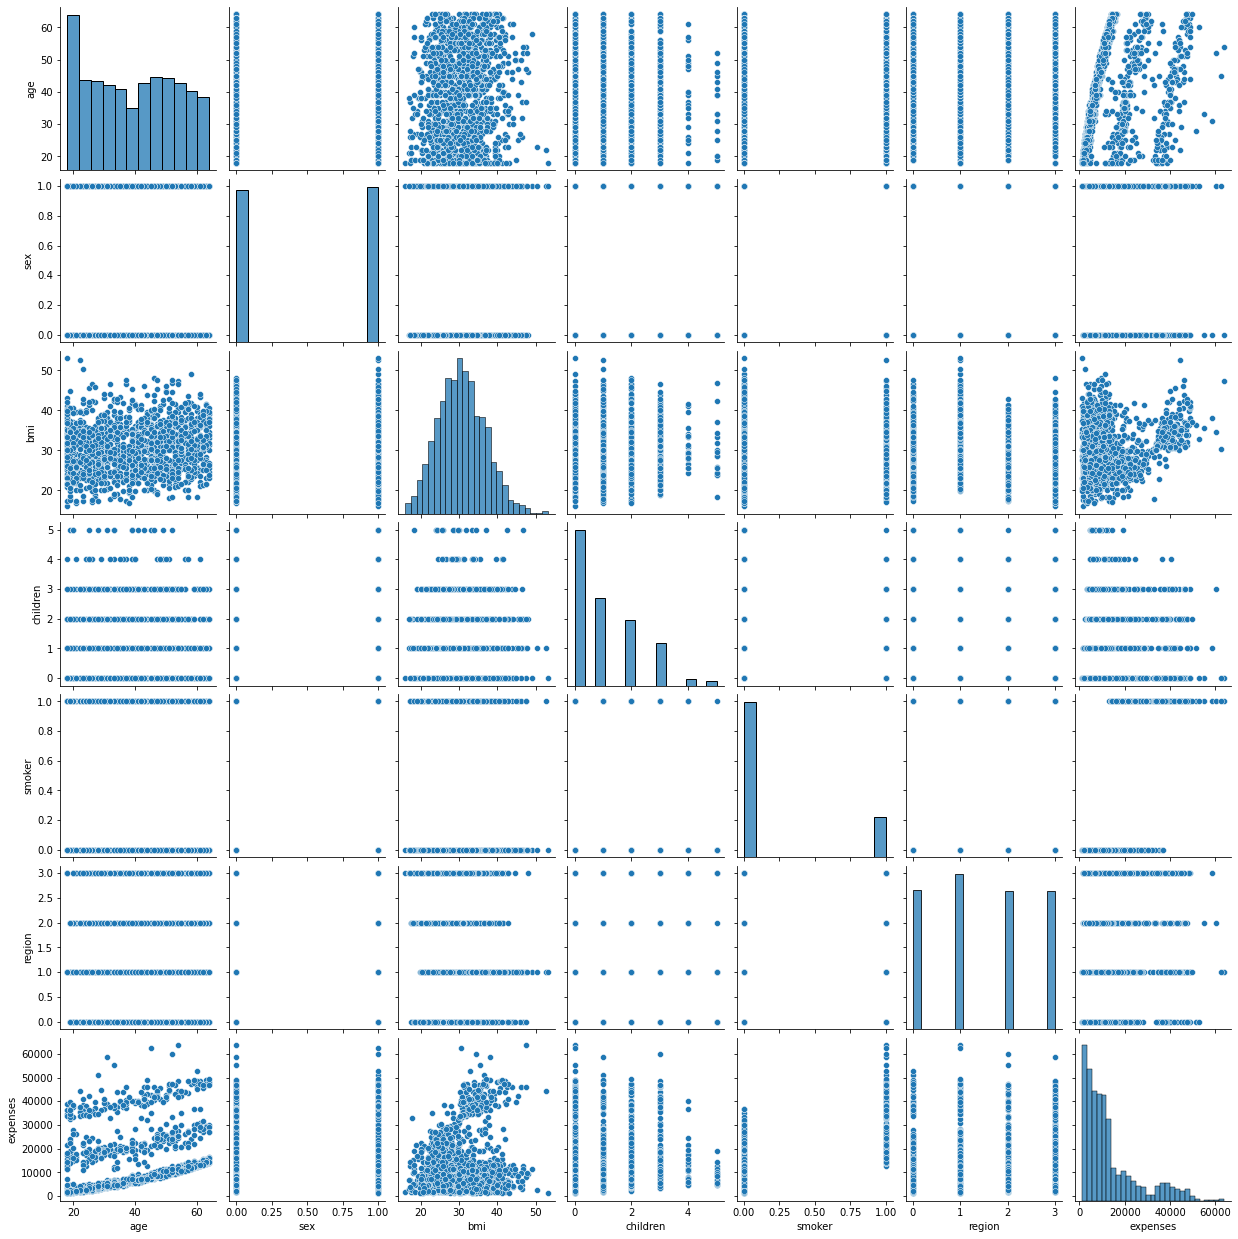

In [137]:
sns.pairplot(data)

In [220]:
X = data[['bmi']]
y = data[['expenses']]

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

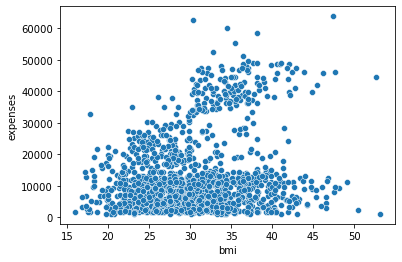

In [139]:
sns.scatterplot(x=data.bmi,y=data.expenses)

In [140]:
def mean_absolute_percentage_error(y_act, y_pred): 
    y_act, y_pred = np.array(y_act), np.array(y_pred)
    return np.mean(np.abs((y_act - y_pred) / y_act)) * 100

In [141]:
def plot_bmi_exp(X_train,y_train,X_test,y_test,y_train_pred,y_test_pred):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.scatter(X_train["bmi"],y_train["expenses"], color='blue')
    plt.plot(X_train["bmi"],y_train_pred,'r')
    plt.subplot(1,2,2)
    plt.scatter(X_test["bmi"],y_test["expenses"], color='blue')
    plt.plot(X_test["bmi"],y_test_pred,'r')
    plt.show()

In [241]:
def predict_compute(X,y,plt_bmi_exp=False):
    display(X.head(), y.head())
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    model = LinearRegression()
    model.fit(X_train,y_train)
    print("Co-eff & intercept: ",model.coef_, model.intercept_)

    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
    train_mae = mean_absolute_error(y_train,y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train,y_train_pred)
    train_r2 = r2_score(y_train,y_train_pred)

    print('*'*30)
    print('train RMSE :', train_rmse)
    print('train MAE  :',  train_mae)
    print('train MAPE :', train_mape)
    print('train R2   :',   train_r2)

    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
    test_mae = mean_absolute_error(y_test,y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test,y_test_pred)
    test_r2 = r2_score(y_test,y_test_pred)
    
    print('*'*30)
    print('test RMSE  :', test_rmse)
    print('test MAE   :',  test_mae)
    print('test MAPE  :', test_mape)
    print('test R2    :',   test_r2)
    
    if plt_bmi_exp == True: plot_bmi_exp(X_train,y_train,X_test,y_test,y_train_pred,y_test_pred)

,bmi
0,27.9
1,33.8
2,33.0
3,22.7
4,28.9


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


(802, 1) (535, 1) (802, 1) (535, 1)
Co-eff & intercept:  [[359.86553571]] [2213.8133626]
******************************
train RMSE : 11850.837167487034
train MAE  : 9088.77817591998
train MAPE : 144.7439027352503
train R2   : 0.03409228358788341
******************************
test RMSE  : 11889.929395371599
test MAE   : 9229.508594226862
test MAPE  : 158.29058492241495
test R2    : 0.04636573084545026


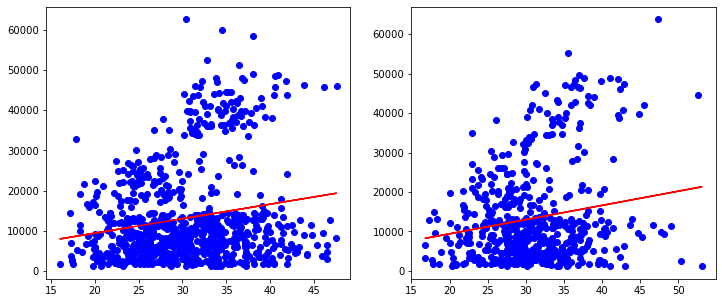

In [221]:
predict_compute(X,y,plt_bmi_exp=True)

In [144]:
unscaled = pd.concat([X,y],axis=1)
unscaled.head()

,bmi,expenses
0,27.9,16884.92
1,33.8,1725.55
2,33.0,4449.46
3,22.7,21984.47
4,28.9,3866.86


In [145]:
minmax_scale = MinMaxScaler().fit_transform(unscaled)
print(type(minmax_scale))
scaled = pd.DataFrame(minmax_scale, columns=['bmi','expenses'])
scaled.head()


<class 'numpy.ndarray'>


,bmi,expenses
0,0.320755,0.251611
1,0.479784,0.009636
2,0.458221,0.053115
3,0.180593,0.333010
4,0.347709,0.043816


In [222]:
X = scaled[['bmi']]
#y = scaled[['expenses']]
y = data[['expenses']]

,bmi
0,0.320755
1,0.479784
2,0.458221
3,0.180593
4,0.347709


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


(802, 1) (535, 1) (802, 1) (535, 1)
Co-eff & intercept:  [[13351.01137475]] [7971.66193392]
******************************
train RMSE : 11850.837167487034
train MAE  : 9088.77817591998
train MAPE : 144.74390273525026
train R2   : 0.03409228358788341
******************************
test RMSE  : 11889.929395371599
test MAE   : 9229.508594226862
test MAPE  : 158.29058492241495
test R2    : 0.04636573084545026


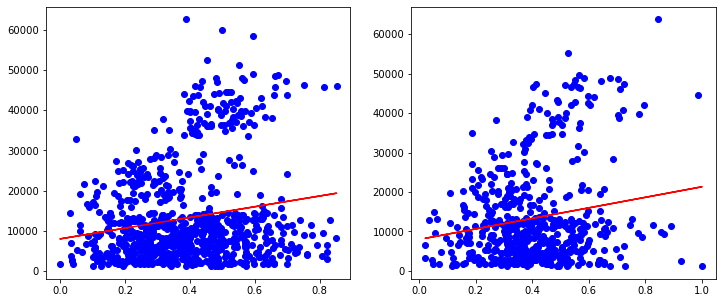

In [223]:
predict_compute(X,y,plt_bmi_exp=True)

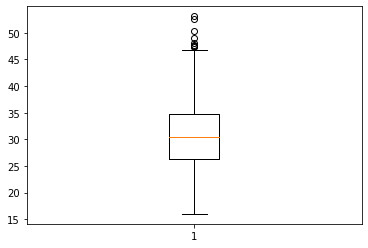

In [148]:
plt.boxplot(data['bmi'])
plt.show()

In [149]:
data[['bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,1337.0,30.66552,6.100664,16.0,26.3,30.4,34.7,53.1


In [150]:
data.bmi.agg(["count","mean","median"])

count     1337.00000
mean        30.66552
median      30.40000
Name: bmi, dtype: float64

In [151]:
data[['bmi']].sort_values(by=['bmi'])

,bmi
172,16.0
428,16.8
1226,16.8
412,17.2
250,17.3
...,...
286,48.1
116,49.1
847,50.4
1047,52.6


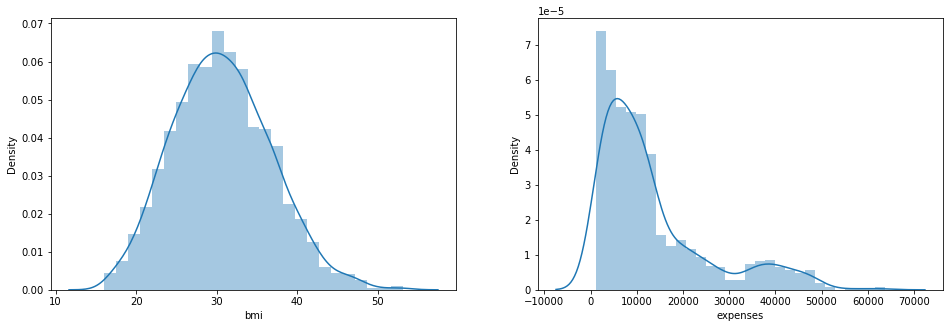

In [152]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['bmi'])
plt.subplot(1,2,2)
sns.distplot(data['expenses'])
plt.show()

In [153]:
print("Highest allowed",data['bmi'].mean() + 3*data['bmi'].std())
print("Lowest allowed",data['bmi'].mean() - 3*data['bmi'].std())

Highest allowed 48.96751130627064
Lowest allowed 12.363528334716758


In [154]:
data[(data['bmi'] > 48.96) | (data['bmi'] < 12.36)]

,age,sex,bmi,children,smoker,region,expenses
116,58,1,49.1,0,0,1,11381.33
847,23,1,50.4,1,0,1,2438.06
1047,22,1,52.6,1,1,1,44501.40
1317,18,1,53.1,0,0,1,1163.46


In [155]:
zdata = data[(data['bmi'] < 48.97) & (data['bmi'] > 12.36)]
zdata[['bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,1333.0,30.603601,6.003288,16.0,26.2,30.3,34.6,48.1


In [156]:
data[['bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,1337.0,30.66552,6.100664,16.0,26.3,30.4,34.7,53.1


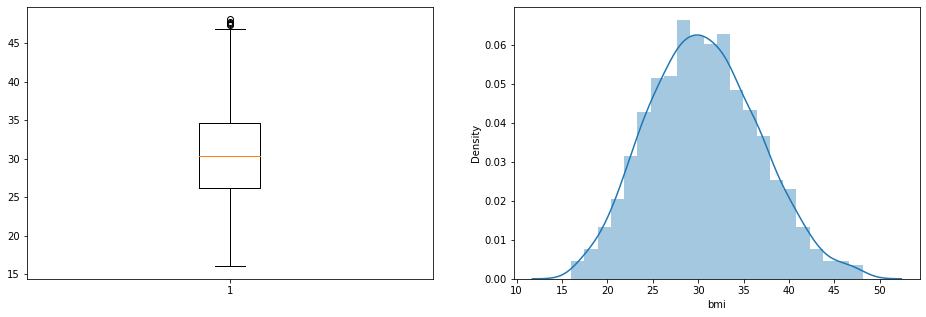

In [157]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.boxplot(zdata['bmi'])
plt.subplot(1,2,2)
sns.distplot(zdata['bmi'])
plt.show()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


,bmi
0,27.9
1,33.8
2,33.0
3,22.7
4,28.9


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


(799, 1) (534, 1) (799, 1) (534, 1)
Co-eff & intercept:  [[395.32411434]] [1168.50507689]
******************************
train RMSE : 11557.483048939765
train MAE  : 9018.712061285501
train MAPE : 148.03495743745006
train R2   : 0.0412584628541911
******************************
test RMSE  : 12247.431546340133
test MAE   : 9351.808562848944
test MAPE  : 150.91811155493423
test R2    : 0.0389957570104158


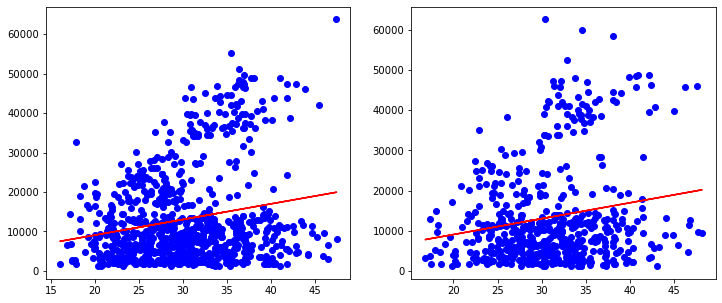

In [225]:
display(zdata.head())
X = zdata[['bmi']]
y = zdata[['expenses']]

predict_compute(X,y,plt_bmi_exp=True)

# Using all features for modelling

In [159]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [226]:
X = data.drop(columns='expenses')
y = data[['expenses']]
predict_compute(X,y)

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,0
1,18,1,33.8,1,0,1
2,28,1,33.0,3,0,1
3,33,1,22.7,0,0,2
4,32,1,28.9,0,0,2


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


(802, 6) (535, 6) (802, 1) (535, 1)
Co-eff & intercept:  [[  233.77543215  -595.2950718    298.12097675   418.27075626
  24592.94627493   518.35830179]] [-10876.80984395]
******************************
train RMSE : 6042.074523605726
train MAE  : 4005.4691197501584
train MAPE : 39.49073444199486
train R2   : 0.7489213822990062
******************************
test RMSE  : 6130.226703832496
test MAE   : 4262.36463906199
test MAPE  : 44.500296219410004
test R2    : 0.7465009308321617


In [227]:
X = data.drop(columns='expenses')
y = data[['expenses']]
minmax_scale = MinMaxScaler().fit_transform(X)
print(type(minmax_scale))
all_scaled = pd.DataFrame(minmax_scale, columns=['age','sex','bmi','children','smoker','region'])
display(all_scaled.head())

X = all_scaled
y = data[['expenses']]
predict_compute(X,y)

<class 'numpy.ndarray'>


,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.320755,0.0,1.0,0.000000
1,0.000000,1.0,0.479784,0.2,0.0,0.333333
2,0.217391,1.0,0.458221,0.6,0.0,0.333333
3,0.326087,1.0,0.180593,0.0,0.0,0.666667
4,0.304348,1.0,0.347709,0.0,0.0,0.666667


,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.320755,0.0,1.0,0.000000
1,0.000000,1.0,0.479784,0.2,0.0,0.333333
2,0.217391,1.0,0.458221,0.6,0.0,0.333333
3,0.326087,1.0,0.180593,0.0,0.0,0.666667
4,0.304348,1.0,0.347709,0.0,0.0,0.666667


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


(802, 6) (535, 6) (802, 1) (535, 1)
Co-eff & intercept:  [[10753.66987907  -595.2950718  11060.28823741  2091.3537813
  24592.94627493  1555.07490536]] [-1898.91643719]
******************************
train RMSE : 6042.074523605726
train MAE  : 4005.4691197501747
train MAPE : 39.49073444199534
train R2   : 0.7489213822990062
******************************
test RMSE  : 6130.226703832492
test MAE   : 4262.364639062001
test MAPE  : 44.500296219410515
test R2    : 0.7465009308321622


In [228]:
#One hot encoding
encoded = pd.get_dummies(data,columns=['children','region'])
X = encoded.drop(columns=['expenses'])
y = data[['expenses']]
predict_compute(X,y)

,age,sex,bmi,smoker,children_0,children_1,children_2,children_3,children_4,children_5,region_0,region_1,region_2,region_3
0,19,0,27.9,1,1,0,0,0,0,0,1,0,0,0
1,18,1,33.8,0,0,1,0,0,0,0,0,1,0,0
2,28,1,33.0,0,0,0,0,1,0,0,0,1,0,0
3,33,1,22.7,0,1,0,0,0,0,0,0,0,1,0
4,32,1,28.9,0,1,0,0,0,0,0,0,0,1,0


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


(802, 14) (535, 14) (802, 1) (535, 1)
Co-eff & intercept:  [[  234.21952195  -590.24805348   301.52581099 24591.88917684
  -1117.20702151  -319.37517576   534.33773449  -360.45704877
   1879.30337431  -616.60186277  -653.12321535  -525.41536147
    348.83463078   829.70394604]] [-9283.22232957]
******************************
train RMSE : 6021.604279132871
train MAE  : 4035.569890910153
train MAPE : 39.46358658141567
train R2   : 0.7506197838146381
******************************
test RMSE  : 6132.014177980115
test MAE   : 4279.897577150563
test MAPE  : 44.16055673750155
test R2    : 0.7463530768893561


In [197]:
data[['age']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0


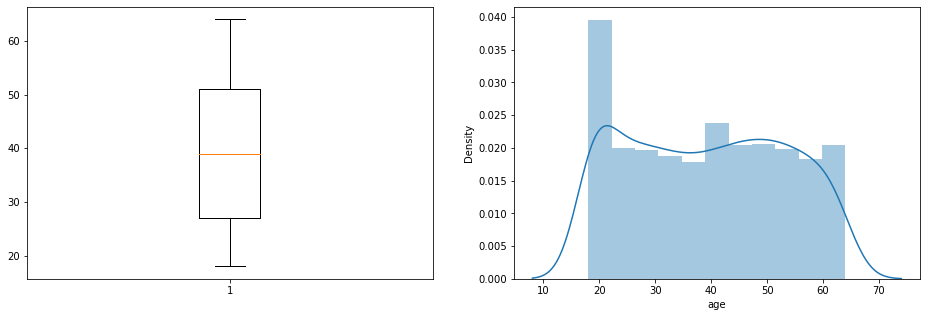

In [196]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.boxplot(data['age'])
plt.subplot(1,2,2)
sns.distplot(data['age'])
plt.show()
plt.subplot(1,2,2)
sns.pairplot

In [232]:
age_bins = [0, 20, 35, 50, 60, np.inf]
age_names = ['<20', '20-35', '35-50', '50-60', '60+']
bin_data = data.copy()
bin_data['age_range'] = pd.cut(bin_data['age'], age_bins, labels=age_names)
encoded_bin_data = pd.get_dummies(bin_data,columns=['age_range'])

X = encoded_bin_data.drop(columns=['age','expenses'])
y = data[['expenses']]
predict_compute(X,y)

,sex,bmi,children,smoker,region,age_range_<20,age_range_20-35,age_range_35-50,age_range_50-60,age_range_60+
0,0,27.9,0,1,0,1,0,0,0,0
1,1,33.8,1,0,1,1,0,0,0,0
2,1,33.0,3,0,1,0,1,0,0,0
3,1,22.7,0,0,2,0,1,0,0,0
4,1,28.9,0,0,2,0,1,0,0,0


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


(802, 10) (535, 10) (802, 1) (535, 1)
Co-eff & intercept:  [[ -719.31897244   309.24315833   540.53043012 24671.56716801
    504.23253081 -4748.74730562 -3233.37099811  -795.43350778
   3780.56579564  4996.98601587]] [-1375.54640918]
******************************
train RMSE : 6079.849740916523
train MAE  : 4104.003092296999
train MAPE : 43.28523580498819
train R2   : 0.7457720672280936
******************************
test RMSE  : 6173.400122735856
test MAE   : 4350.875403526772
test MAPE  : 49.44845013301477
test R2    : 0.74291771564691


In [242]:
age_bins = [0, 20, 35, 50, 60, np.inf]
age_names = ['<20', '20-35', '35-50', '50-60', '60+']

bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]
bmi_names = ['under wt', 'normal wt', 'over wt', 'obese']

bin_data = data.copy()
bin_data['age_range'] = pd.cut(bin_data['age'], age_bins, labels=age_names)
bin_data['bmi_range'] = pd.cut(bin_data['bmi'], bmi_bins, labels=bmi_names)
all_encoded_bin_data = pd.get_dummies(bin_data,columns=['bmi_range','children','region','age_range'])

X = all_encoded_bin_data.drop(columns=['age','bmi','expenses'])
y = data[['expenses']]
predict_compute(X,y)


,sex,smoker,bmi_range_under wt,bmi_range_normal wt,bmi_range_over wt,bmi_range_obese,children_0,children_1,children_2,children_3,...,children_5,region_0,region_1,region_2,region_3,age_range_<20,age_range_20-35,age_range_35-50,age_range_50-60,age_range_60+
0,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


(935, 21) (402, 21) (935, 1) (402, 1)
Co-eff & intercept:  [[-2.47688500e+02  2.44063973e+04  5.03003177e+17  5.03003177e+17
   5.03003177e+17  5.03003177e+17 -2.71538309e+17 -2.71538309e+17
  -2.71538309e+17 -2.71538309e+17 -2.71538309e+17 -2.71538309e+17
   1.00480178e+18  1.00480178e+18  1.00480178e+18  1.00480178e+18
  -2.38690381e+17 -2.38690381e+17 -2.38690381e+17 -2.38690381e+17
  -2.38690381e+17]] [-9.97576268e+17]
******************************
train RMSE : 6005.323289192227
train MAE  : 4174.107732620321
train MAPE : 45.62940452372739
train R2   : 0.7482852656240471
******************************
test RMSE  : 6158.5553311715485
test MAE   : 4376.77447761194
test MAPE  : 46.23362070608148
test R2    : 0.7529101353616202


In [261]:
#display(data_orig.head())
display(data_orig["sex"].value_counts())
display(data_orig["smoker"].value_counts())
display(data_orig["region"].value_counts())
Z=data_orig[["sex","smoker","region"]].astype("category")
display(Z.head())
# Assign the cat values
display(Z["sex"].cat.codes.value_counts())
display(Z["smoker"].cat.codes.value_counts())
display(Z["region"].cat.codes.value_counts())
#data.head(10)


male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


1    676
0    662
dtype: int64

0    1064
1     274
dtype: int64

2    364
3    325
1    325
0    324
dtype: int64

In [245]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
